In [ ]:
#note the bleow code works if the elment
#has same parameters such as A,E,l
#of same material type for vibrations and temperature 
#and fluid flow it differs and the load is a
#point load and it can be assigned correspondingly
#but for a bar element of different type so A1,E1,l1
#and A2,E2,l2 use a different code given below
#if the material propertyies differ  just use a different code 
#this 2x2 matrix can be extended to temperature fluid flow 
#stress calculation in bar element ands so on
#Note : these are to serve the test purpose and not suited for any 
#comecial or industrial use in engineeering or any discipline
#so i can not hold responsibilty of money loss or material loss or human loss
#this tool helps only for eductional pupose for Anna university
#and Aicte affiliated universityies 
#students in europe and asia and other parts of the world can use this 
#by selecting correct correctr metric system suits their country

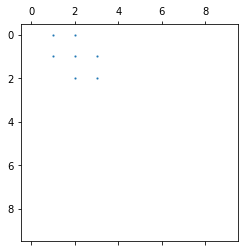

In [7]:

import csv
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

# Read the CSV file with indices
with open('/content/indices.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) # skip the header row
    indices = [list(map(int, row)) for row in reader]

# Initialize the global stiffness matrix with zeros
global_stiffness_matrix = np.zeros((10, 10))

# Loop through the indices
for row in indices:
    i, j = row
    # Assemble the local stiffness matrix
    local_stiffness_matrix = np.array([[2, -1], [-1, 2]])
    # Add the local stiffness matrix to the corresponding entries in the global stiffness matrix
    global_stiffness_matrix[i-1:i+1, j-1:j+1] += local_stiffness_matrix

# Convert the global stiffness matrix to a sparse matrix
sparse_global_stiffness_matrix = csr_matrix(global_stiffness_matrix)

# Plot the sparse matrix plot of the global stiffness matrix
plt.spy(sparse_global_stiffness_matrix, markersize=1)
plt.show()
# Save the global stiffness matrix in Python format
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')




In [ ]:
#now the indices are listed from 1,2,3 but the matrix builds it
#from 0 so delete the column using the code beleow still its a banded matrix
#use any method to equate it to force vector and solve it to get displacements

In [10]:
import numpy as np

# Create a sample matrix
matrix = np.array([[0.0, 2.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, -1.0, 4.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

# Delete the first column
new_matrix = np.delete(matrix, 0, axis=1)

# Print the new matrix
print(new_matrix)


[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


[[ 3.   0.   0.  -1.5 -1.5  0.  -1.5  1.5]
 [ 0.   8.  -1.   0.   0.  -4.   1.  -4. ]
 [ 0.  -1.   4.   0.   1.  -4.   0.   0. ]
 [-1.5  0.   0.   1.5  1.5 -1.5  0.   0. ]
 [-1.5  0.  -4.   1.5  9.5 -2.5  1.  -4. ]
 [ 0.  -4.   1.  -1.5 -2.5  7.   1.5 -1.5]
 [-1.5  1.   0.   0.  -4.   1.5  5.5 -2.5]
 [ 1.5 -4.   0.   0.   1.  -1.5 -2.5  5.5]]


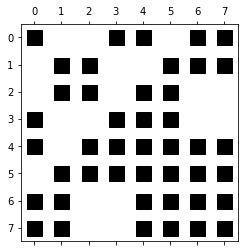

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3', 'i4', 'i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 8
num_element_stiffness_matrices = 2
element_stiffness_matrices = [np.array([[1.5, 0, 0, -1.5, -1.5,1.5], [0, 4, -1, 0, 1,-4], [0, -1, 4, 0, 1,-4], [-1.5, 0, 0, 1.5, 1.5,-1.5], [-1.5, 1, -4, 1.5, 5.5,-2.5],[1.5, -4, 1, -1.5, -2.5,5.5]]),np.array([[1.5, 0, 0, -1.5, -1.5,1.5], [0, 4, -1, 0, 1,-4], [0, -1, 4, 0, 1,-4], [-1.5, 0, 0, 1.5, 1.5,-1.5], [-1.5, 1, -4, 1.5, 5.5,-2.5],[1.5, -4, 1, -1.5, -2.5,5.5]])]
#filename = '/content/indices6.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices6.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='black')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')

[[ 1. -1.  0.  0.  0.  0.]
 [-1.  4. -1. -2.  0.  0.]
 [ 0. -1.  2.  0. -1.  0.]
 [ 0. -2.  0.  4. -2.  0.]
 [ 0.  0. -1. -2.  4. -1.]
 [ 0.  0.  0.  0. -1.  1.]]


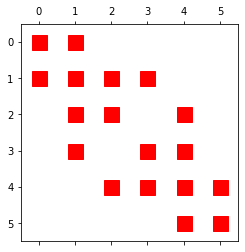

In [15]:

import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 3), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 3)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 6
num_element_stiffness_matrices = 4
element_stiffness_matrices = [np.array([[1, -1,0], [-1,2,-1], [0,-1,1]]),
                             np.array([[1, -1,0], [-1,2,-1], [0,-1,1]]),np.array([[1, -1,0], [-1,2,-1], [0,-1,1]]),np.array([[1, -1,0], [-1,2,-1], [0,-1,1]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices3.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

In [ ]:
# solve the force vector given by 
#the assembly is much simpler than gst assembly 
#just look for the indices like 
#1,2,4
#{1,1,1}
#2,4,5
#{1,1,1}
#2,3,5
#{1,1,1}
#4,5,6
#{1,1,1}
#you know why 2,4,5 adds up because it exist in three columns so it adds up
#[ 1., 3.,  1. , 3. , 3. , 1.]
#there are some coeeficients to solve it 

[[ 10. -10.   3.   0.  -3.]
 [-10.  40. -10. -10. -10.]
 [  3. -10.  10.  -3.   0.]
 [  0. -10.  -3.  10.   3.]
 [ -3. -10.   0.   3.  10.]]


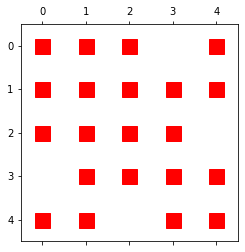

In [39]:

import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 3), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 3)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 5
num_element_stiffness_matrices = 4
element_stiffness_matrices = [np.array([[5, 3,-8], [3,5,-8], [-8,-8,16]]),
                             np.array([[5, -3,-2], [-3,5,-2], [-2,-2,4]])
                             ,np.array([[5,3,-8], [3,5,-8], [-8,-8,16]])
                             ,np.array([[5, -3,-2], [-3,5,-2], [-2,-2,4]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices3ex.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

In [ ]:
# solve the force vector given by 
#the assembly is much simpler than gst assembly 
#just look for the indices like 
#1,3,2
#{1.333,1.333,1.333}
#3,4,2
#{1.333,1.3333,1.333}
#4,5,2
#{1.333,1.333,1.333}
#5,1,2
#{1.333,1.333,1.333}
#you know why 2,4,5 adds up because it exist in three columns so it adds up
#[ 2.666,5.333,2.666,2.666,2.666]
#there are some coeeficients to solve it 

[[ 1.2889  0.4701 -0.2899 -0.4701 -1.      0.      0.      0.      0.
   0.    ]
 [ 0.4701  0.7622 -0.4701  0.7622  0.      0.      0.      0.      0.
   0.    ]
 [-0.2899 -0.4701  1.5788  0.     -0.2899  0.4701 -1.      0.      0.
   0.    ]
 [-0.4701 -0.7622  0.      1.5244  0.4701 -0.7622  0.      0.      0.
   0.    ]
 [-1.      0.     -0.2899  0.4701  2.5788  0.     -0.2899 -0.4701 -1.
   0.    ]
 [ 0.      0.      0.4701 -0.7622  0.      1.5244 -0.4701  0.7622  0.
   0.    ]
 [ 0.      0.     -1.      0.     -0.2899 -0.4701  1.5788  0.     -0.2899
   0.4701]
 [ 0.      0.      0.      0.     -0.4701 -0.7622  0.      1.5244  0.4701
  -0.7622]
 [ 0.      0.      0.      0.     -1.      0.     -0.2899  0.4701  1.2899
  -0.4701]
 [ 0.      0.      0.      0.      0.      0.      0.4701 -0.7622 -0.4701
   0.7622]]


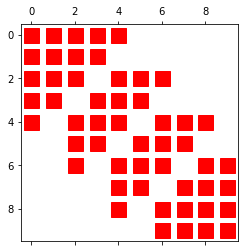

In [47]:

import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 4), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 4)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 10
num_element_stiffness_matrices = 3

element_stiffness_matrices =[np.array([[.2889, .4701,-.2899,-.4701], [.4701, .7622,-.4701,.7622],[-.2899, -.4701,.2899,.4701], [-.4701, -.7622,.4701,.7622]]),
np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, -.4701,-.2899,.4701], [-.4701, .7622,.4701,-.7622],[-.2899, .4701,.2899,-.4701], [.4701, -.7622,-.4701,.7622]])
,np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, .4701,-.2899,-.4701], [.4701, .7622,-.4701,.7622],[-.2899, -.4701,.2899,.4701], [-.4701, -.7622,.4701,.7622]])
,np.array([[1, 0,-1,0], [0, 0,0,0],[-1, 0,1,0], [0, 0,0,0]])
,np.array([[.2889, -.4701,-.2899,.4701], [-.4701, .7622,.4701,-.7622],[-.2899, .4701,.2899,-.4701], [.4701, -.7622,-.4701,.7622]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices4.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

In [ ]:
#THE FORCE VECTOR LOOKS LIKE THIS
#[0,0,0,0,0,-100,0,0,0,0] SO YOU CAN SOLVE FOR THIS VECTOR
# THE ABOVE RESULTS ARE CORRECT AND TESTED

In [ ]:
#the below given problems give bad wrong results so go up and check it

In [20]:

import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        indices[i, :] = np.random.randint(1, n+1, 6)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4','i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 8
num_element_stiffness_matrices = 2
element_stiffness_matrices = [np.array([[140, 0,0,-70,-140,70], [0,400,-60,0,60,-400], [0,-60,100,0,-100,60] ,[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130][70,-400,60,-35,-130,435]]),
                             np.array([[100, 0,-100,60,0,-60], [0,35,70,-35,-70,0], [-100,70,240,-130,-140,60] ,[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0][-60,0,60,-400,0,400]])]
#filename = 'indices.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices6dlogan.csv')
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)
print(global_stiffness_matrix)
# Plot the global stiffness matrix as a sparse plot array
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()
# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')

<>:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:24: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:24: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-20-c1fc24d93968>:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  element_stiffness_matrices = [np.array([[140, 0,0,-70,-140,70], [0,400,-60,0,60,-400], [0,-60,100,0,-100,60] ,[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130][70,-400,60,-35,-130,435]]),
<ipython-input-20-c1fc24d93968>:24: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  np.array([[100, 0,-100,60,0,-60], [0,35,70,-35,-70,0], [-100,70,240,-130,-140,60] ,[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0][-60,0,60,-

TypeError: ignored

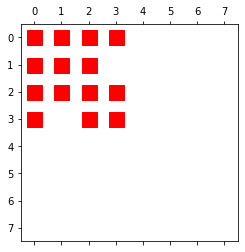

In [23]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        for j in range(3):
            indices[i, j*2] = indices[i, j*2+1] = j+1
        indices[i, 1::2] += np.random.randint(0, n-2, 3)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4','i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 8
num_element_stiffness_matrices = 2
element_stiffness_matrices = [np.array([[140, 0,0,-70,-140,70], [0,400,-60,0,60,-400], [0,-60,100,0,-100,60] ,[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130],[70,-400,60,-35,-130,435]]),
                             np.array([[100, 0,-100,60,0,-60], [0,35,70,-35,-70,0], [-100,70,240,-130,-140,60] ,[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0],[-60,0,60,-400,0,400]])]

#filename = '/content/indices6dlogan.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices6dlogan.csv')
indices_df = indices_df[['i1', 'i3', 'i5', 'i2', 'i4', 'i6']]
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)

# Plot the global stiffness matrix as a sparse plot array
import matplotlib.pyplot as plt
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()

# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')


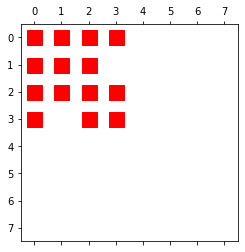

In [25]:
import numpy as np
import pandas as pd

def generate_indices_csv(filename, n, num_element_stiffness_matrices):
    indices = np.zeros((num_element_stiffness_matrices, 6), dtype=int)
    for i in range(num_element_stiffness_matrices):
        for j in range(3):
            indices[i, j*2] = j+1
            indices[i, j*2+1] = j+1+np.random.randint(0, n-1)
    df = pd.DataFrame(indices, columns=['i1', 'i2', 'i3','i4','i5','i6'])
    df.to_csv(filename, index=False)

def assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df):
    global_stiffness_matrix = np.zeros((n, n))
    for i, row in indices_df.iterrows():
        index = row.tolist()
        for row in range(element_stiffness_matrices[i].shape[0]):
            for col in range(element_stiffness_matrices[i].shape[1]):
                if index[row] <= n and index[col] <= n:
                    global_stiffness_matrix[index[row]-1, index[col]-1] += element_stiffness_matrices[i][row, col]
    return global_stiffness_matrix

n = 8
num_element_stiffness_matrices = 2
element_stiffness_matrices = [np.array([[140, 0,0,-70,-140,70], [0,400,-60,0,60,-400], [0,-60,100,0,-100,60] ,[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130],[70,-400,60,-35,-130,435]]),
                             np.array([[100, 0,-100,60,0,-60], [0,35,70,-35,-70,0], [-100,70,240,-130,-140,60] ,[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0],[-60,0,60,-400,0,400]])]

#filename = '/content/indices6dlogan.csv'
#generate_indices_csv(filename, n, num_element_stiffness_matrices)
indices_df = pd.read_csv('/content/indices6dlogan.csv')
indices_df = indices_df[['i1', 'i3', 'i5', 'i2', 'i4', 'i6']]
global_stiffness_matrix = assemble_global_stiffness_matrix(n, element_stiffness_matrices, indices_df)

# Plot the global stiffness matrix as a sparse plot array
import matplotlib.pyplot as plt
plt.spy(global_stiffness_matrix, markersize=15, color='red')
plt.show()

# Save the global stiffness matrix in a text file
np.savetxt("global_stiffness_matrix.txt", global_stiffness_matrix, fmt='%d')
# Save the global stiffness matrix in Python matrix format
import numpy as np

with open('global_stiffness_matrix.py', 'w') as f:
    f.write('import numpy as np\n\n')
    f.write('global_stiffness_matrix = np.array([\n')
    for i in range(global_stiffness_matrix.shape[0]):
        f.write('    [')
        for j in range(global_stiffness_matrix.shape[1]):
            f.write(str(global_stiffness_matrix[i][j]))
            if j < global_stiffness_matrix.shape[1] - 1:
                f.write(', ')
        f.write(']')
        if i < global_stiffness_matrix.shape[0] - 1:
            f.write(',\n')
    f.write('])\n')


In [26]:
import numpy as np

def assemble_global_stiffness_matrix(element_stiffness_matrices, indices):
    num_nodes = (np.max(indices) + 1)
    global_stiffness_matrix = np.zeros((num_nodes, num_nodes))
    for element_stiffness_matrix, (i, j, k, l, m, n) in zip(element_stiffness_matrices, indices):
        submatrix = np.array([[i, j, k], [j, l, m], [k, m, n]])
        global_stiffness_matrix[np.ix_([i, j, k], [i, j, k])] += element_stiffness_matrix[:3, :3]
        global_stiffness_matrix[np.ix_([i, j, k], [l, m, n])] += element_stiffness_matrix[:3, 3:]
        global_stiffness_matrix[np.ix_([l, m, n], [i, j, k])] += element_stiffness_matrix[3:, :3]
        global_stiffness_matrix[np.ix_([l, m, n], [l, m, n])] += element_stiffness_matrix[3:, 3:]
    return global_stiffness_matrix


In [27]:
element_stiffness_matrices = [np.array([[140, 0,0,-70,-140,70], [0,400,-60,0,60,-400], [0,-60,100,0,-100,60] ,[-70,0,0,35,70,-35],[-140,60,-100,70,240,-130],[70,-400,60,-35,-130,435]]),
                              np.array([[100, 0,-100,60,0,-60], [0,35,70,-35,-70,0], [-100,70,240,-130,-140,60] ,[60,-35,-130,435,70,-400],[0,-70,-140,70,140,0],[-60,0,60,-400,0,400]])]

indices = [(1,1,3,3,2,2), (1,1,4,4,3,3)]

global_stiffness_matrix = assemble_global_stiffness_matrix(element_stiffness_matrices, indices)

print(global_stiffness_matrix)


[[   0.    0.    0.    0.    0.]
 [   0.  435. -400.  -60.   35.]
 [   0. -400.  435.   25.    0.]
 [   0.  -60.   25.  535. -340.]
 [   0.   35.    0. -340.  415.]]


In [28]:
import numpy as np

# Define element stiffness matrices
element_stiffness_matrices = [
    np.array([[140, 0, 0, -70, -140, 70], [0, 400, -60, 0, 60, -400], [0, -60, 100, 0, -100, 60], 
              [-70, 0, 0, 35, 70, -35], [-140, 60, -100, 70, 240, -130], [70, -400, 60, -35, -130, 435]]),
    np.array([[100, 0, -100, 60, 0, -60], [0, 35, 70, -35, -70, 0], [-100, 70, 240, -130, -140, 60], 
              [60, -35, -130, 435, 70, -400], [0, -70, -140, 70, 140, 0], [-60, 0, 60, -400, 0, 400]])
]

# Define element indices
element_indices = [(1, 1, 3, 3, 2, 2), (1, 1, 4, 4, 3, 3)]

# Compute global stiffness matrix
n = max(max(indices) for indices in element_indices)
global_stiffness_matrix = np.zeros((n, n))
for i, indices in enumerate(element_indices):
    k = element_stiffness_matrices[i]
    for p, q in zip(indices, indices[::-1]):
        global_stiffness_matrix[p-1, q-1] += k[indices.index(p), indices.index(q)]

print(global_stiffness_matrix)


[[   0. -280.    0.    0.]
 [-280.    0.    0.    0.]
 [   0.    0.  200.    0.]
 [   0.    0.    0.  480.]]
